Using cpu device


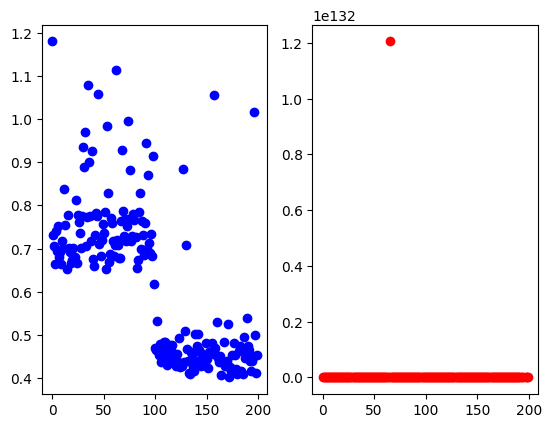

In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    TRAINING_INPUT_N = 10000
    TESTING_INPUT_N = 3000
    RNG = np.random.default_rng()
    EPOCH_LIMIT = 200  

    def __init__(self):
        super().__init__()
        self.training_inputs = self.generate_inputs(self.TRAINING_INPUT_N)
        self.training_outputs = self.generate_outputs(self.training_inputs)

        self.testing_inputs = self.generate_inputs(self.TESTING_INPUT_N)
        self.testing_outputs = self.generate_outputs(self.testing_inputs)    

        self.layers = nn.Sequential(
            nn.Linear(2, 3), #Bias default to true, they don't count towards the count
            nn.Tanh(),
            nn.Linear(3, 2),
            nn.Tanh(),
            nn.Linear(2, 1),
            nn.Tanh()
        )
        self.loss_function = nn.MSELoss()
        self.learning_rate = 0.01 

        self.e_ins = np.empty(self.EPOCH_LIMIT)
        self.e_outs = np.empty(self.EPOCH_LIMIT)

    def generate_inputs(self, N):
        return self.RNG.uniform(-1,1,(N, 2))

    def generate_outputs(self, inputs):
        # Circle function (our target function):
        # If x_1^2 + x_2^2 < .5, then we are inside our circle (return +1) (which has radius of sqrt(.5) =~ .707).  else return -1.
        return np.sign(.5 - (np.square(inputs[:,0]) + np.square(inputs[:,1])))

    def forward(self, x):
        # Get the shape right
        x = torch.unsqueeze(torch.from_numpy(x).to(torch.float32), 0)
        prediction = self.layers(x)
        return prediction

    def train(self):
        optimizer = torch.optim.SGD(model.parameters(), lr=self.learning_rate)

        losses = []

        training_inputs = self.training_inputs
        training_outputs = self.training_outputs
        for epoch_count in range(self.EPOCH_LIMIT):
            # generate permutations
            input_perm = np.random.permutation(len(training_inputs))

            for training_input_id in input_perm:
                training_input = training_inputs[training_input_id]
                optimizer.zero_grad()
                
                prediction = self.forward(training_input)

                training_output = torch.tensor([training_outputs[training_input_id]]).to(torch.float32)
                loss = self.loss_function(prediction, training_output)
                
                
                loss.backward()
                optimizer.step()

            # Report E_in and E_out for the epoch
            avg_e_in = self.test(training_inputs, training_outputs)
            self.e_ins[epoch_count] = avg_e_in
            avg_e_out = self.test(self.testing_inputs, self.testing_outputs)
            self.e_outs[epoch_count] = avg_e_in
    
    def test(self, inputs, outputs):
        total_loss = 0
        for input_id, test_input in enumerate(inputs):
            prediction = self.forward(test_input)

            test_output = torch.tensor([outputs[input_id]]).to(torch.float32)
            loss = self.loss_function(prediction, test_output)

            total_loss += loss
        
        return total_loss / len(inputs)


    def display_errs(self):
        figure, axis = plt.subplots(1, 2)
        axis[0].scatter(range(0, self.EPOCH_LIMIT), self.e_ins, c='blue')
        axis[1].scatter(range(0, self.EPOCH_LIMIT), self.e_outs, c='red')
        plt.show()



            

        

                

model = NeuralNetwork().to(device)
model.train()
model.display_errs()